In [107]:
%load_ext autoreload
%autoreload 2
import seaborn as sns
from pyr_flow.utils.evaluation_utils import *
import importlib

#importlib.reload(pyr_flow.utils.evaluation_utils)


from matplotlib import pyplot as plt
%matplotlib inline


sns.set_style('whitegrid')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [108]:
COMPLETE_NLL = 0
TOP_NLL = 1

In [109]:
file_name = '1 - Test loss -2.89671 nll 1.05178 Norm -0.83318 Top Loss -5.46255 Eval loss -2.89961 nll 1.04827 Norm -0.83318 Top Loss -5.46562'
file_name = "33 - Test loss -88.45176 nll -9.61440 Norm -11.50307 Top Loss -158.35823 Eval loss -88.47104 nll -9.62277 Norm -11.50307 Top Loss -158.36227"
model_path = f'../{STATE_DIR}CIFAR/{file_name}.model'

results = load_eval_data(model_path)

Channel Shifter - Shift 9 by 1
Conv Bundle 97 - Size: 9 total_pixel_depth: 9 internal_pixel_depth: 1 jump_over_pixels :False |param count: 90
Cut Off - Remaining Depth 3
Combine Neighbors - 2x2
Combine Neighbors - 2x2
Combine Neighbors - 2x2
Channel Shifter - Shift 192 by 1
Conv Bundle 98 - Size: 192 total_pixel_depth: 192 internal_pixel_depth: -1 jump_over_pixels :False |param count: 37056
Cut Off - Remaining Depth 96
Channel Shifter - Shift 96 by 1
Conv Bundle 99 - Size: 96 total_pixel_depth: 96 internal_pixel_depth: -1 jump_over_pixels :False |param count: 9312
Cut Off - Remaining Depth 48
Channel Shifter - Shift 48 by 1
Conv Bundle 100 - Size: 48 total_pixel_depth: 48 internal_pixel_depth: -1 jump_over_pixels :False |param count: 2352
Cut Off - Remaining Depth 24
Channel Shifter - Shift 24 by 1
Conv Bundle 101 - Size: 24 total_pixel_depth: 24 internal_pixel_depth: -1 jump_over_pixels :False |param count: 600
Cut Off - Remaining Depth 12
Channel Shifter - Shift 12 by 1
Conv Bundle 1

C:\Mega\trunk\pyramidic-normalizing-flow\pyr_flow\misc\misc.py:25: UserWarning: wanna use XAVIER?
  warnings.warn(text)
C:\Mega\trunk\pyramidic-normalizing-flow\pyr_flow\misc\misc.py:25: UserWarning: adjust scaling - we start with a 24x24x1 image now!
  warnings.warn(text)
C:\Mega\trunk\pyramidic-normalizing-flow\pyr_flow\misc\misc.py:25: UserWarning: no non-linearity used
  warnings.warn(text)


In [110]:
results[EvaluatedDatasets.CIFAR_TRAIN][TOP_NLL].max()

-0.39638913

In [111]:
def filter_threshold(llarray, threshold):
    print(np.sum(llarray < threshold)/len(llarray)*100, "inliers")
    return llarray[llarray < threshold]

def plot_mean(set):
    mean = set.mean()
    plt.vlines(mean)

def plot_all(idx, threshold):
    c_train = results[EvaluatedDatasets.CIFAR_TRAIN][idx]
    c_test = results[EvaluatedDatasets.CIFAR_TEST][idx]
    svhn = results[EvaluatedDatasets.SVHN][idx]

    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)


    sns.distplot(filter_threshold(c_train, threshold), label=f"Cifar Test {c_test.mean():.5f}", color='r', ax=ax)
    sns.distplot(filter_threshold(c_test, threshold), label=f"Cifar Train {c_train.mean():.5f}", color='g', ax=ax)
    sns.distplot(filter_threshold(svhn, threshold), label=f"SVHN {svhn.mean():.3f}", color='b', ax=ax)

    plt.axvline(c_test.mean(), color='r')
    plt.axvline(c_train.mean(), color='g')
    plt.axvline(svhn.mean(), color='b')

    # plt.xticks(np.linspace(-11000, 0, 5), fontsize=16)
    #plt.yticks(np.linspace(0., 0.0006, 5), fontsize=13)
    plt.legend(fontsize=13)

100.0 inliers
100.0 inliers
100.0 inliers


C:\Users\luifire\.conda\envs\pyrFlow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\luifire\.conda\envs\pyrFlow\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\luifire\.conda\envs\pyrFlow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\luifire\.conda\envs\pyrFlow\lib\site-packages\seaborn\distributions.py:305

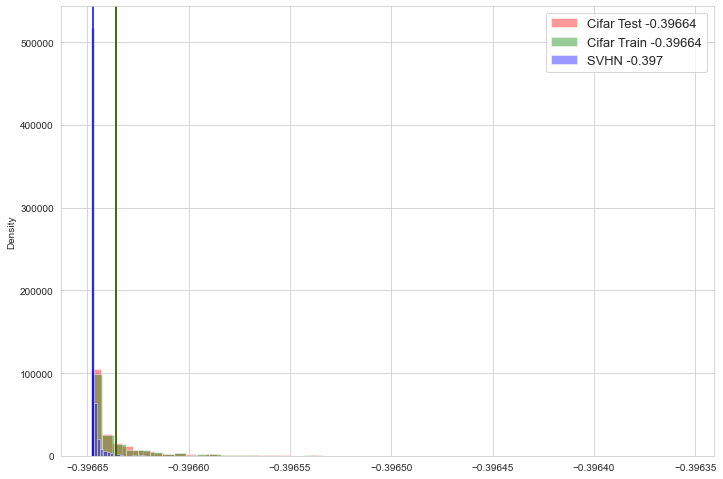

In [112]:
plot_all(TOP_NLL, threshold = -0.0424)

In [113]:
print("Top NLL")

Top NLL


100.0 inliers
100.0 inliers
100.0 inliers


C:\Users\luifire\.conda\envs\pyrFlow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\luifire\.conda\envs\pyrFlow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\luifire\.conda\envs\pyrFlow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

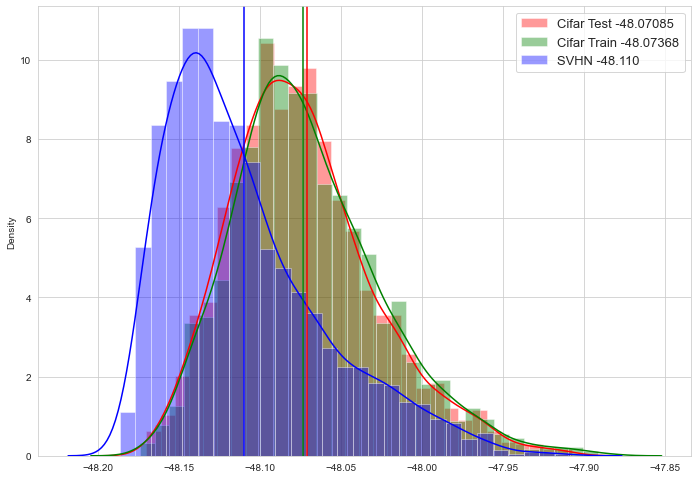

In [114]:
plot_all(COMPLETE_NLL, threshold = 1000)

In [115]:
print("Complete NLL")


Complete NLL
